In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from helpers2 import *

In [3]:
#data_folder = Path("../data/")
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Data analysis

In [21]:
print(y)
print(np.shape(y))
print(np.shape(tX))
print(tX.dtype)
print(y.dtype)

[ 1. -1. -1. ...  1. -1. -1.]
(250000,)
(250000, 30)
float64
float64


The training data set is composed of : 
* a y vector of length 250'000 and type float
* a tX float matrix of 250'000 rows and 30 columns

It means that our data set is composed of 250'000 different obsevations of 30 different features. In the rest of the notebook, we name the features by their index nummer. So, it means from the feature 0 from the feature  29.

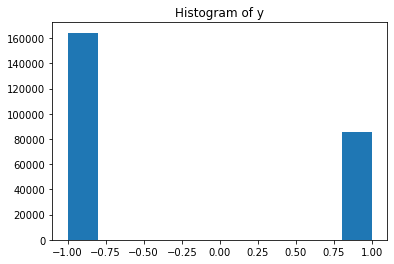

In [14]:
plt.hist(y)
plt.title('Histogram of y')
plt.show()

There is more y = -1 than y = 1 in the data, so there is more y = 'b' than y = 's'. So, we have to pay attention to normalize the data in order to compare them in the next plots.

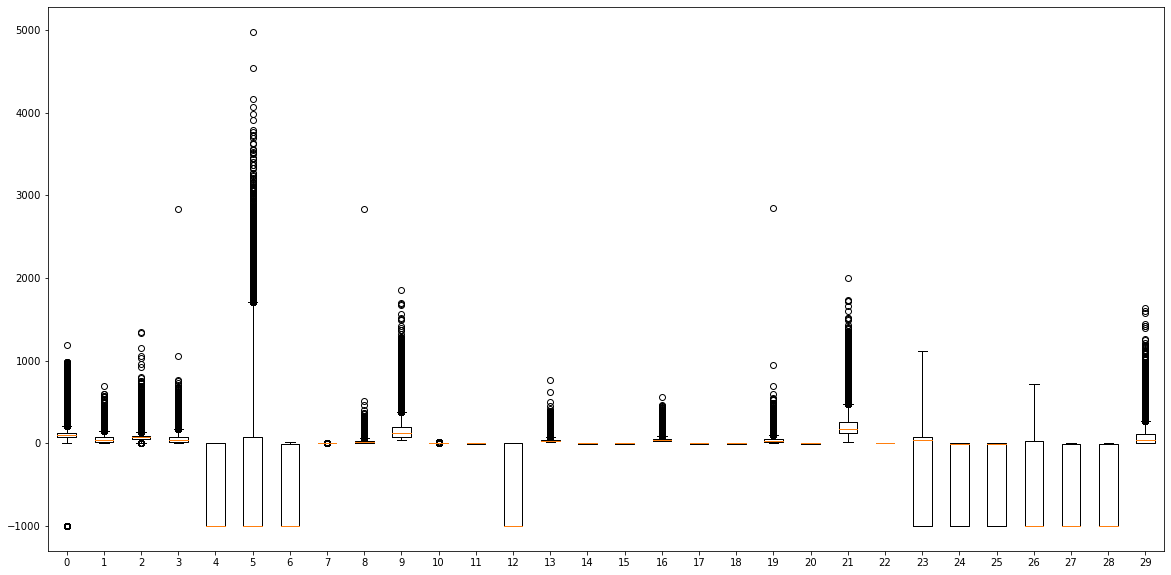

In [15]:
plt.figure(figsize=(20, 10))
ind = np.arange(30)
plt.boxplot(tX[:,], labels = ind)

plt.show()

There are many outliers depending on the feature. There are also feature that has a long interquantile range. Maybe we have to treat these feature in order to be more efficient in our futur predictions. Let's do more plots to be have a better idea :

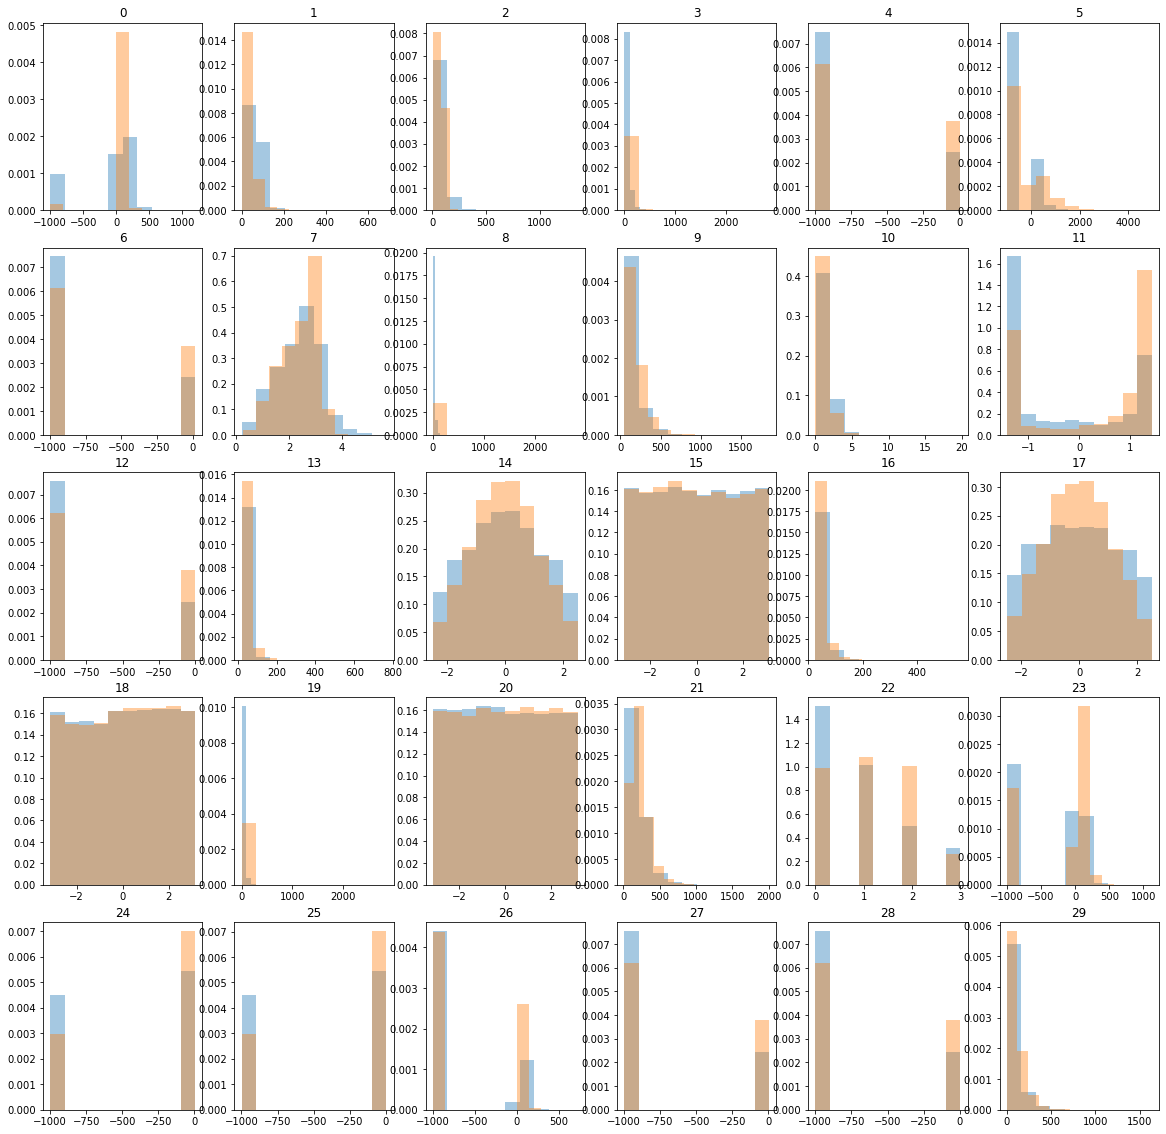

In [20]:
ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].hist(tX_2[:,n], alpha=0.4, density=True, label=['y=-1', 'y=1'])
        axs[i,j].hist(tX_1[:,n], alpha=0.4, density=True)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

By plotting the histograms of the features with a color for each y, we can see that there are useless features as they have almost the same distribution for y=1 than for y = -1. We can cut feature 15, 18, 20. 


There are also features that are very inequally distributed with value that are about -1000 and values around 0 ; it can be problematic for the prediction with such a large gap between values of a single distribution. Moreover, there is not a big difference in the distribution of y=1 and y=-1. Maybe it can be useful to put off these big negative values of these features. The features in question are : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.


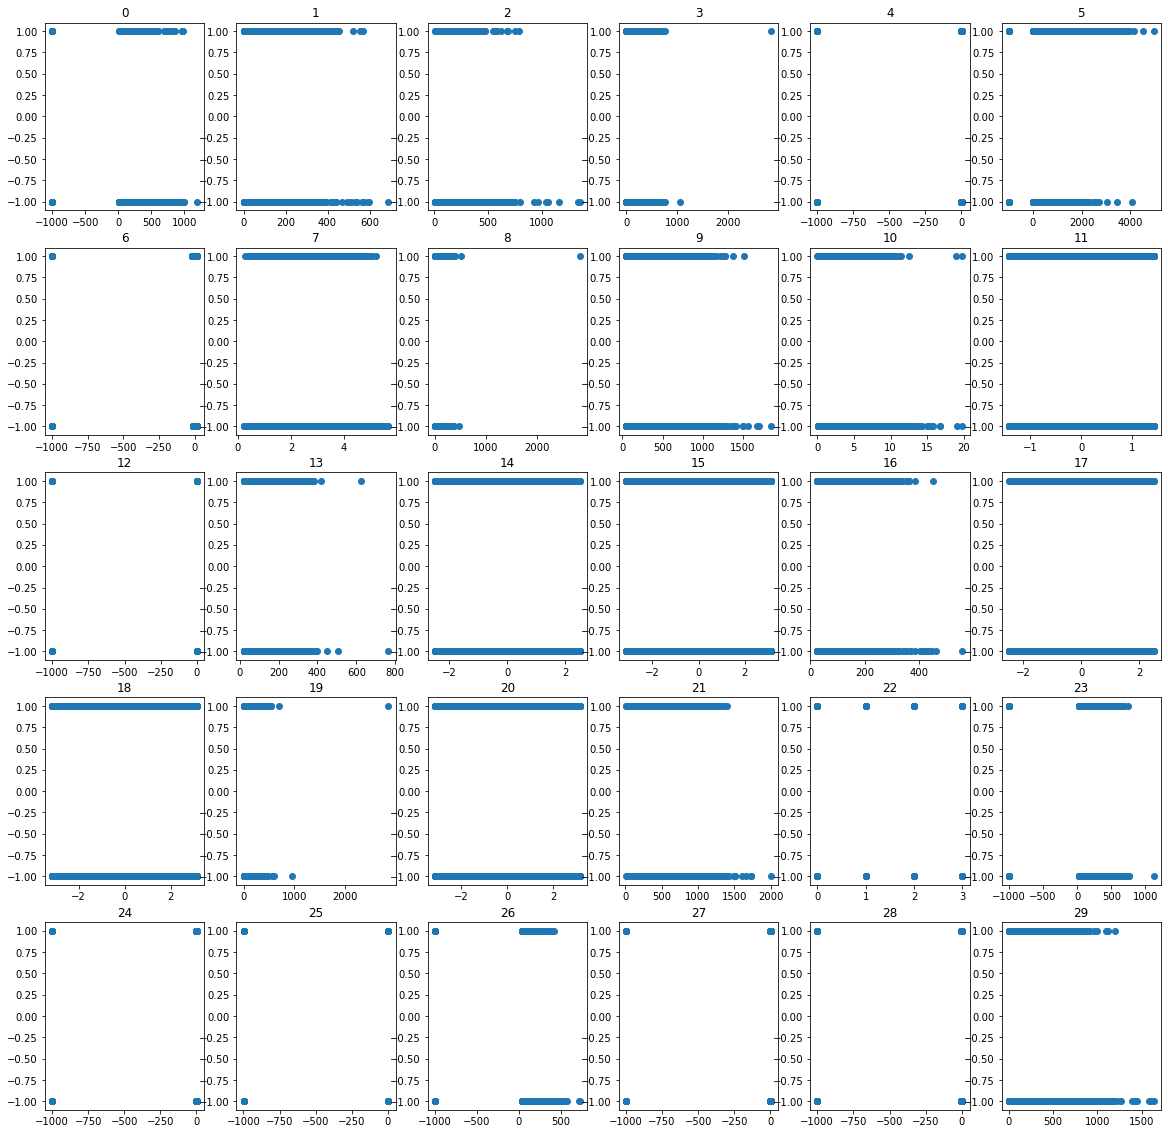

In [10]:
fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].scatter(tX[:,n], y)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

#meme constat comment faire pour se debarrasser de ces valeurs ??

These plots confirm the obsevations that we made in the previous plot ; no difference of the distribution of y for features 15, 18, 20 and very large gap in the distributions of features : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.

## Data filtering

### Outliers

In [38]:
def nb_outliers(tX, outlier) : 
    sum = 0
    nb_outliers = []
    for col in range(tX.shape[1]) :
        sum = np.where(tX[:,col] == outlier)[0].shape
        nb_outliers.append(sum)   
    print(nb_outliers)
    print(np.where(tX==outlier)[0].shape)

out = -999

print('number of -999 in the entire matrix :')
nb_outliers(tX, out)

ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

print('number of -999 in the rows where y = 1 :')
nb_outliers(tX_1, out)
print('number of -999 in the rows where y = -1 :')
nb_outliers(tX_2, out)

number of -999 in the entire matrix :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = 1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = -1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)


We have a problem with features  0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28. They are inequally distributed; they have a lot of -999 values and the rest is values around 0. So, here we can see how much of these -999 there are. We can see that the -999 appear only in the features that we identified with the histograms. It seems that there is a correlation between features as many features have the same number of -999. We can also see that there is more -999 in the obsevations where y=-1, so we have to take this into account when we filter the data. As there are many -999, we can't delete the rows where there is -999 because we will loose to much information.

### Mean and Standardization

In [4]:
# Changer par la valeur da la mean du feature en question sans les compter dedans
def filtering_with_mean(tX):
    index = [0,4,5,6,12,23,24,25,26,27,28]
    tX_filtered = np.copy(tX)
    arr = []
    for ind in index :
        arr = np.delete(tX_filtered[:,ind], np.where(tX_filtered[:,ind]==-999))
        mean = np.mean(arr)
        tX_filtered[np.where(tX_filtered[:,ind]==-999), ind] = mean
    return tX_filtered

In [5]:
def filtering_with_mean_bis(tX) :
    index = [0,4,5,6,12,23,24,25,26,27,28]
    tX_filtered = np.copy(tX)
    
    ind_1 = np.where(y == 1)[0]
    ind_2 = np.where(y == -1)[0]
    tX_1 = tX[ind_1,:]
    tX_2 = tX[ind_2,:]
    
    ind_3 = np.where(tX[:,0]==-999)[0]
    new_ind_1 = np.intersect1d(ind_3, ind_1)
    new_ind_2 = np.intersect1d(ind_3, ind_2)
    
    arr_1 = []
    arr_2 = []
    for ind in index :
        arr_1 = np.delete(tX_1[:,ind], np.where(tX_1[:,ind]==-999))
        mean_1 = np.mean(arr_1)
        arr_2 = np.delete(tX_2[:,ind], np.where(tX_2[:,ind]==-999))
        mean_2 = np.mean(arr_2)
        tX_filtered[new_ind_1, ind] = mean_1
        tX_filtered[new_ind_2, ind] = mean_2
    return tX_filtered

In [6]:
def std(tX) :
    for i in range(tX.shape[1]) :
        tX[:,i] = (tX[:,i] - np.mean(tX[:,i])) / np.std(tX[:,i])
    return tX

In order to filter the data, we want to get rif of these -999, but we can't just delete the rows. So, we have the idea to replace the -999 by the mean of the rest of values of the feature. As there is a significant difference of amount of -999 in between y=1 and y=-1 in certain features, we calculate the mean for the rows where y = 1 and y = -1 separatly.

Then, we can also standardize the data. It can be a good idea because the features are not all in the same range of values and it can create disproportionality between the importance of the features.

### Cutting features 

In [7]:
def cut(tX, to_cut):
    cut_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_cut)):
            if index_full[i] == to_cut[j]:
                cut_index[i] = to_cut[j]
    index = index_full[~(index_full == cut_index)]
    index = index.reshape(-1)
    tX_cut = tX[:, index]
    return tX_cut

def keep(tX, to_keep):
    keep_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_keep)):
            if index_full[i] == to_keep[j]:
                keep_index[i] = to_keep[j]
    index = index_full[index_full == keep_index]
    index = index.reshape(-1)
    tX_kept = tX[:, index]
    return tX_kept

As we see above in the histograms, some features seem to be useless as they have a similar distribution between the y = 1 and y = -1. So, it is useful to have function that cut or keep some parameters.

## Fonctions 

In [8]:
from implementations import *
from cross_validation import *

#### Feature engineering

In [9]:
tX_mean = filtering_with_mean_bis(tX)
tX_std = std(tX_mean)

to_cut = [15,18,20]
tX_mean_cut = cut(tX_std, to_cut)

to_cut = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
tX_cut = cut(tX_std, to_cut)

to_keep = [13, 14, 17]
tX_kept = keep(tX_std, to_keep)

#### Choose x and generate test and train data 

In [10]:
x1 = tX_mean
x2 = tX_kept
x3 = tX_std
x4 = tX_mean_cut

### Least squares

Cross validation to get parameters

In [11]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, x1, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX = build_poly(x1, degree_opt)
w_ls, loss_ls = least_squares(y, tX)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls = degree_opt

best rmses [0.8231175884842529, 0.8979223616318159, 7.308968843078411, 5.88777733392936, 512.5958418775379, 9054.790584765498, 744694.938882026, 6765151.079275852, 456649238.73841524, 7249486426.358366]
Cross validation finished: optimal degree 1
Least square loss 0.3386372049426044


In [62]:
#je commente sinon pas le bon w_ls pour la submission
""""w_ls, loss_ls = least_squares(y, x1)
print("Least square loss {loss}".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
print("Least square mse loss {loss} with degree 8".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
loss_ls = np.sqrt(2*loss_ls)
print("Least square rmse loss {loss} with degree 8".format(loss=loss_ls))"""

'"w_ls, loss_ls = least_squares(y, x1)\nprint("Least square loss {loss}".format(loss=loss_ls))\nw_ls, loss_ls = least_squares(y, build_poly(x1, 8))\nprint("Least square mse loss {loss} with degree 8".format(loss=loss_ls))\nw_ls, loss_ls = least_squares(y, build_poly(x1, 8))\nloss_ls = np.sqrt(2*loss_ls)\nprint("Least square rmse loss {loss} with degree 8".format(loss=loss_ls))'

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, x4, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX2 = build_poly(x4, degree_opt)
w_ls2, loss_ls2 = least_squares(y, tX2)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls2 = degree_opt

### Ridge regression 

Cross validation to find the oprimal lambda and degree

In [ ]:
degrees = np.arange(1,11)
degree_opt, lambda_opt = best_degree_selection(y, x1, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
tX = build_poly(x1, degree_opt)
w_rr, loss_rr = ridge_regression(y, tX, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
degree_rr = degree_opt

### Gradient descent

CV to find best gamma

In [64]:
# Si tu fais ca avec tous les features, ca prend beaucoup de temps (>1h) et ne converge pas
# en prenant x_kept on converge vers loss=0.42 et gamma_opt = 2.51 
# je pense qu'il faut trouver un just milieu entre 30 et 3 features 
max_iters = 50
k_fold = 4
initial_w = np.zeros(x.shape[1])
gammas = np.arange(0, 3, 0.03)
gamma_opt = cross_validation(y, x2, k_fold, gammas, fonction=2)

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4634160843093332
Gradient Descent(2/49): loss=0.4542701053866668
Gradient Descent(3/49): loss=0.4519836106560001
Gradient Descent(4/49): loss=0.4514119869733334
Gradient Descent(5/49): loss=0.4512690810526668
Gradient Descent(6/49): loss=0.4512333545725
Gradient Descent(7/49): loss=0.4512244229524584
Gradient Descent(8/49): loss=0.4512221900474479
Gradient Descent(9/49): loss=0.45122163182119535
Gradient Descent(10/49): loss=0.45122149226463204
Gradient Descent(11/49): loss=0.4512214573754914
Gradient Descent(12/49): loss=0.4512214486532063
Gradient Descent(13/49): loss=0.4512214464726348
Gradient Descent(14/49): loss=0.45122144592749225
Gradient Descent(15/49): loss=0.45122144579120627
Gradient Descent(16/49): loss=0.4512214457571348
Gradient Descent(17/49): loss=0.45122144574861717
Gradient Descent(18/49): loss=0.45122144574648737
Gradient Descent(19/49): loss=0.45122144574595524
Gradient Descent(20/49): loss=0.451221445

result

In [65]:
w_gd, loss_gd = least_squares_GD(y, x2, gamma_opt, max_iters=max_iters)
print("Gradient descent regression loss {loss} with optimal gamma {g}".format(loss=loss_gd, g=gamma_opt))

1.8200000000000012
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.44440890578566167
Gradient Descent(2/49): loss=0.44024983391625105
Gradient Descent(3/49): loss=0.4376256471028858
Gradient Descent(4/49): loss=0.4354831764450516
Gradient Descent(5/49): loss=0.4337218497498242
Gradient Descent(6/49): loss=0.43227362758912535
Gradient Descent(7/49): loss=0.4310828460324516
Gradient Descent(8/49): loss=0.4301037415182902
Gradient Descent(9/49): loss=0.4292986856635453
Gradient Descent(10/49): loss=0.4286367390275766
Gradient Descent(11/49): loss=0.42809246206268226
Gradient Descent(12/49): loss=0.427644937435685
Gradient Descent(13/49): loss=0.4272769661447635
Gradient Descent(14/49): loss=0.42697440653710034
Gradient Descent(15/49): loss=0.42672563082484527
Gradient Descent(16/49): loss=0.42652107821252283
Gradient Descent(17/49): loss=0.42635288746192346
Gradient Descent(18/49): loss=0.4262145947734255
Gradient Descent(19/49): loss=0.4261008853728879
Gradient Descent(20

### Stochastic gradient descent

cv for gamma

In [70]:
max_iters = 50
k_fold = 4
initial_w = np.zeros(x.shape[1])
gammas = np.arange(0, 3, 0.03)
gamma_opt = cross_validation(y, x2, k_fold, gammas, fonction=2)

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

result

In [71]:
w_sgd, loss_sgd = least_squares_SGD(y, x2, gamma_opt, max_iters=50)
print("Stochastic gradient descent regression loss {loss} with optimal gamma {g}".format(loss=loss_gd, g=gamma_opt))

SGD(0/49): loss=0.5, w0=-0.037348050780443134, w1=-0.0892131248343261
SGD(1/49): loss=0.5334786296601186, w0=-0.03688527826399847, w1=-0.1683343714900538
SGD(2/49): loss=0.5666277427808751, w0=0.016073308438578675, w1=-0.06889369565858076
SGD(3/49): loss=0.5205240833028542, w0=0.03710200199100139, w1=0.02180359228194688
SGD(4/49): loss=0.48966832006871264, w0=0.06427849231935809, w1=0.10473294434706487
SGD(5/49): loss=0.4679893792880534, w0=0.07211117833667495, w1=0.17941902723405947
SGD(6/49): loss=0.45544922869280396, w0=0.10602379689792471, w1=0.24704105822688263
SGD(7/49): loss=0.44727542482689847, w0=0.1413191089654544, w1=0.3113069704501027
SGD(8/49): loss=0.44383260689406634, w0=0.12651207208113555, w1=0.19607840354468647
SGD(9/49): loss=0.4503922329765159, w0=0.16456291735283687, w1=0.26390987755500905
SGD(10/49): loss=0.4436091353985919, w0=0.11211471266205315, w1=0.15353581512444991
SGD(11/49): loss=0.4566045380180913, w0=0.14204070343934774, w1=0.22608976004896775
SGD(12/49)

## Generate predictions and save ouput in csv format for submission:

In [64]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

tX_test1 = filtering_with_mean_bis(tX_test)

tX_test2 = keep(tX_test, to_keep)
tX_test2 = standardize(filtering_with_mean(tX_test))

tX_test3 = std(tX_test)

#### Least squares submissions

In [69]:
OUTPUT_PATH = '../data/pred_ls.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_ls)
y_pred = predict_labels(w_ls, tX_test_ls)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
OUTPUT_PATH = '../data/pred_ls2.csv' # TODO: fill in desired name of output file for submission
tX_test_ls2 = cut(tX_test1, [15,18,20]) 
tX_test_ls2 = build_poly(tX_test_ls2, degree_ls2) 
y_pred = predict_labels(w_ls2, tX_test_ls2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Ridge regression submissions

In [ ]:
OUTPUT_PATH = '../data/pred_rr.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_rr)
y_pred = predict_labels(w_rr, tX_test1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Gradient descent submissions

In [96]:
OUTPUT_PATH = '../data/pred_sg.csv' # TODO: fill in desired name of output file for submission

y_pred = predict_labels(w_gd, tX_test2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: setting an array element with a sequence.

#### Stochastic gradient descent submissions

In [ ]:
OUTPUT_PATH = '../data/pred_sgd.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_sgd, tX_test2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)